In [4]:

import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from PIL import Image

import speckle

im1 = Image.open('../../../dicbenchmarks/plate_hydro/defimage_0000.tiff')
im2 = Image.open('../../../dicbenchmarks/plate_hydro/defimage_0011.tiff')

speckle_pattern = np.array(im1)
deformed_pattern = np.array(im2)

speckle_pattern = np.flip(speckle_pattern,axis=0)
deformed_pattern = np.flip(deformed_pattern,axis=0)


# speckle_pattern = speckle_pattern[0:400,0:200]
# deformed_pattern = deformed_pattern[0:400,0:200]
difference = (speckle_pattern - deformed_pattern)
ic(speckle_pattern.shape)

ic| speckle_pattern.shape: (1540, 1040)

(1540, 1040)

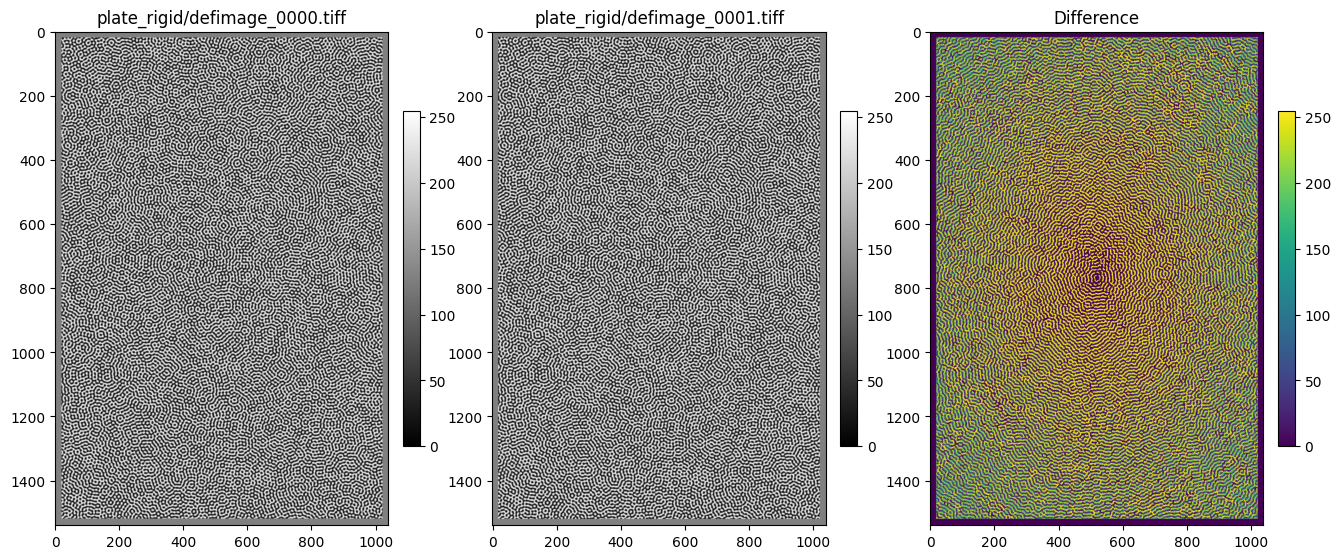

In [5]:
# figure debugging
fig, axes = plt.subplots(1, 3, figsize=(16, 16))

# Display images and store the image objects
im0 = axes[0].imshow(speckle_pattern, cmap="gray", vmin=0, vmax=255)
im1 = axes[1].imshow(deformed_pattern, cmap="gray", vmin=0, vmax=255)
im2 = axes[2].imshow(difference, cmap="viridis")

# Set titles
axes[0].set_title("plate_rigid/defimage_0000.tiff")
axes[1].set_title("plate_rigid/defimage_0001.tiff")
axes[2].set_title("Difference")

# Add colorbars
fig.colorbar(im0, ax=axes[0],fraction=0.046, pad=0.04)
fig.colorbar(im1, ax=axes[1],fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=axes[2],fraction=0.046, pad=0.04)

# plt.tight_layout()
plt.show()



In [ ]:

#-----------------------------------------------------------------------------------------------------------------------------
# DIC
#-----------------------------------------------------------------------------------------------------------------------------
bounds = [(-0.1, 0.1), 
          (-0.1, 0.1), 
          (-0.1, 0.1), 
          (-0.1, 0.1), 
          (-0.1, 0.1), 
          (-0.1, 0.1)]  
p_arr, ssd_arr = speckle.dic.reference_image_interpolation_minimizer(reference_image=deformed_pattern, deformed_image=speckle_pattern, bounds=bounds, subset_size=21, subset_step=10, corr_crit="ssd")

Searching for deformed subsets in the interpolated reference image using scipy.optimize.minimize                                                      : 100%|██████████| 13064/13064 [06:25<00:00, 33.91it/s]


ic| np.mean(p_arr[:,:,0]): np.float64(0.0)
ic| np.mean(p_arr[:,:,1]): np.float64(0.0)
ic| np.mean(p_arr[:,:,2]): np.float64(-0.00123890630467577)
ic| np.mean(p_arr[:,:,3]): np.float64(0.0)
ic| np.mean(p_arr[:,:,4]): np.float64(0.0)
ic| np.mean(p_arr[:,:,5]): np.float64(-0.0010383818719877267)


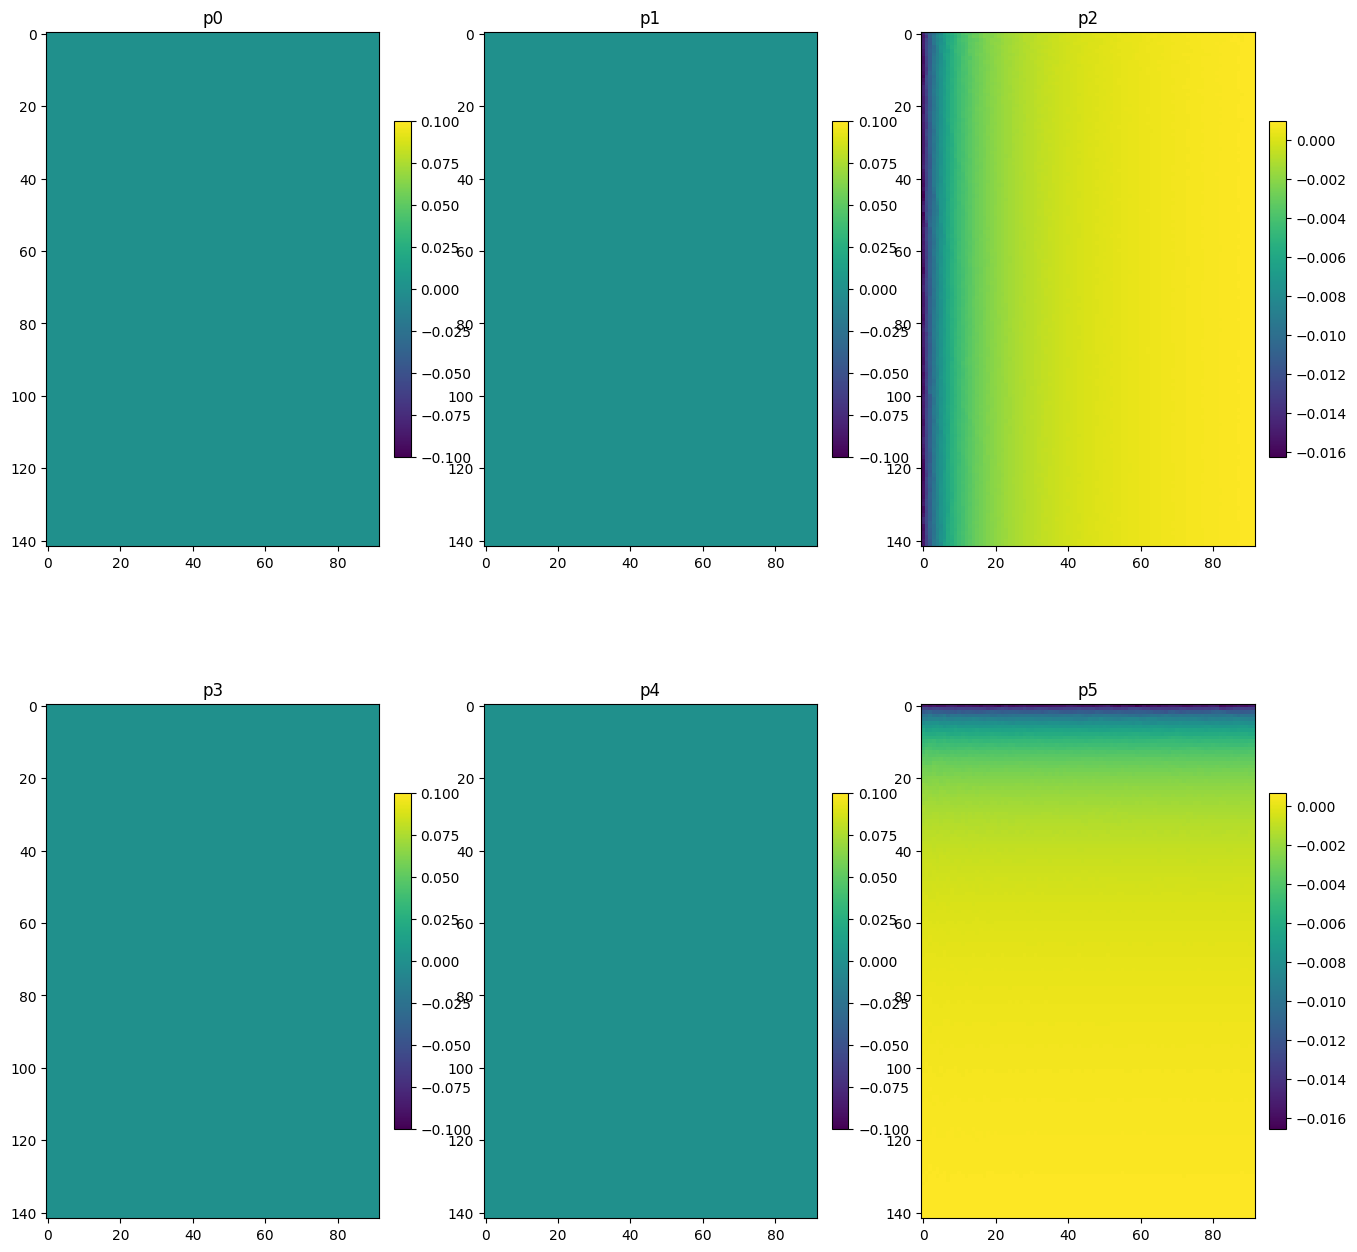

In [9]:
from icecream import ic

ic(np.mean(p_arr[:,:,0]))
ic(np.mean(p_arr[:,:,1]))
ic(np.mean(p_arr[:,:,2]))
ic(np.mean(p_arr[:,:,3]))
ic(np.mean(p_arr[:,:,4]))
ic(np.mean(p_arr[:,:,5]))

# figure debugging
fig, axes = plt.subplots(2, 3, figsize=(16, 16))

# Display images and store the image objects
im0 = axes[0,0].imshow(p_arr[:,:,0], cmap="viridis") #,vmin=-1.5,vmax=1.5'')
im1 = axes[0,1].imshow(p_arr[:,:,1], cmap="viridis") #,vmin=-1.5,vmax=1.5'')
im2 = axes[0,2].imshow(p_arr[:,:,2], cmap="viridis") #,vmin=-1.5,vmax=1.5'')
im3 = axes[1,0].imshow(p_arr[:,:,3], cmap="viridis") #,vmin=-1.5,vmax=1.5'')
im4 = axes[1,1].imshow(p_arr[:,:,4], cmap="viridis") #,vmin=-1.5,vmax=1.5'')
im5 = axes[1,2].imshow(p_arr[:,:,5], cmap="viridis") #,vmin=-1.5,vmax=1.5'')

# Set titles
axes[0,0].set_title("p0")
axes[0,1].set_title("p1")
axes[0,2].set_title("p2")
axes[1,0].set_title("p3")
axes[1,1].set_title("p4")
axes[1,2].set_title("p5")

# Add colorbars
fig.colorbar(im0, ax=axes[0,0],fraction=0.046, pad=0.04)
fig.colorbar(im1, ax=axes[0,1],fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=axes[0,2],fraction=0.046, pad=0.04)
fig.colorbar(im3, ax=axes[1,0],fraction=0.046, pad=0.04)
fig.colorbar(im4, ax=axes[1,1],fraction=0.046, pad=0.04)
fig.colorbar(im5, ax=axes[1,2],fraction=0.046, pad=0.04)

# plt.tight_layout()
plt.show()


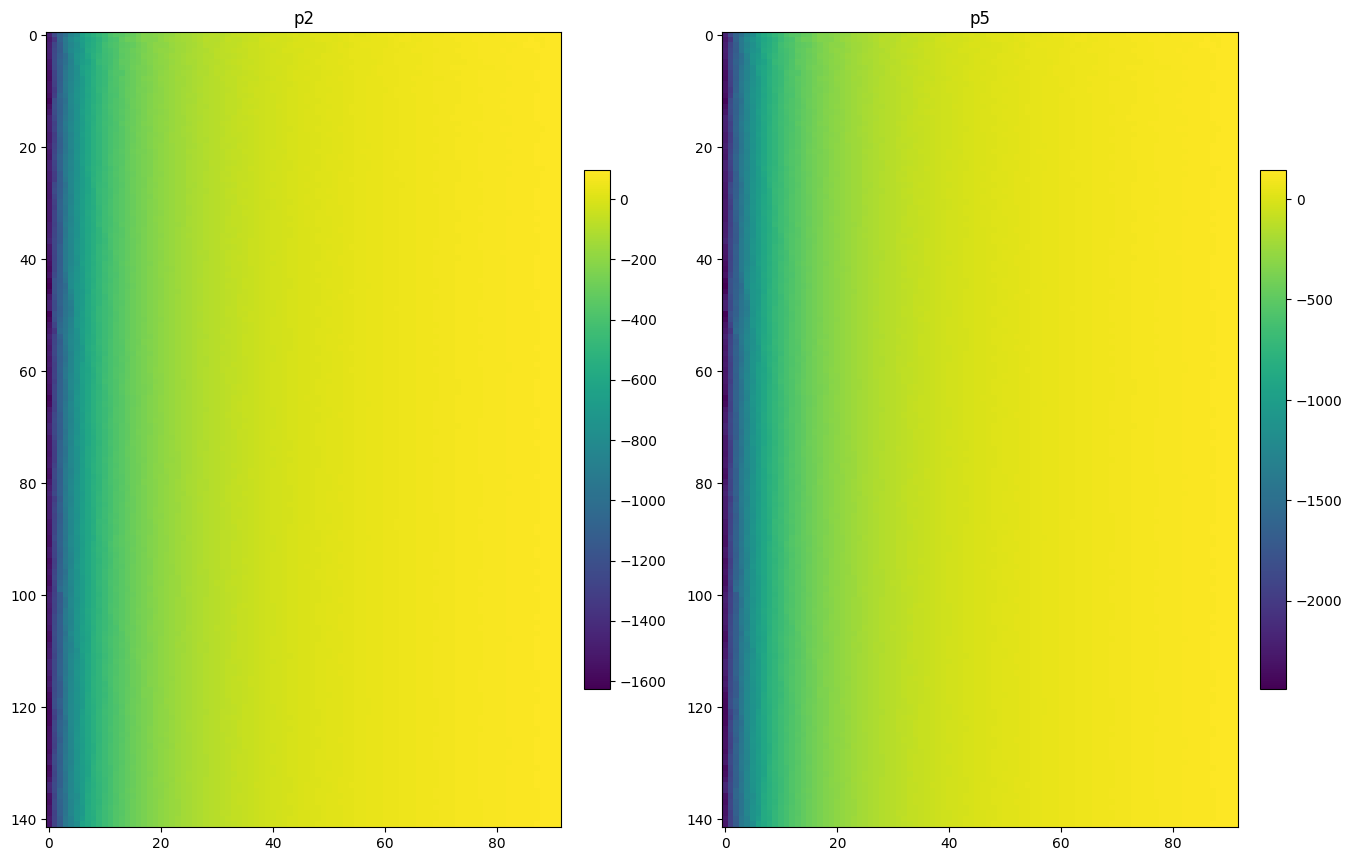

In [8]:
# Percentage errors

from icecream import ic


percent_error_p2 = (p_arr[:,:,2] / 0.001) * 100.0
percent_error_p5 = (p_arr[:,:,2] / 0.0006666666) * 100.0


# figure debugging
fig, axes = plt.subplots(1, 2, figsize=(16, 16))

# Display images and store the image objects
im0 = axes[0].imshow(percent_error_p2, cmap="viridis") #,vmin=-1.5,vmax=1.5'')
im1 = axes[1].imshow(percent_error_p5, cmap="viridis") #,vmin=-1.5,vmax=1.5'')

# Set titles
axes[0].set_title("p2")
axes[1].set_title("p5")

# Add colorbars
fig.colorbar(im0, ax=axes[0],fraction=0.046, pad=0.04)
fig.colorbar(im1, ax=axes[1],fraction=0.046, pad=0.04)

# plt.tight_layout()
plt.show()